# 1)- Présentation du Projet

L'achat d'une assurance auto peut être une tâche ardue et nous voulons comprendre comment l'état civil influence la décision d'une personne d'acheter une assurance auto à la suite d'un appel téléphonique.

Ceci est un jeu de données d'une banque aux États-Unis. Outre les services habituels, cette banque fournit également des services de carassurance. La banque organise régulièrement des campagnes pour attirer de nouveaux clients. La banque dispose de données sur les clients potentiels. 

Les employés de la banque les appellent pour faire de la publicité pour les options d’assurance auto disponibles. 

Plisieurs informations générales sur les clients sont fournies(âge, emploi,,mariés, célibataires ou divorcés, etc.) ainsi que des informations plus spécifiques sur la campagne de vente d’assurance en cours (communication, dernier jour de contact) et les campagnes précédentes (attributs tels que tentatives précédentes, résultat d'appel si les clients ont souscrit ou non une assurance automobile à la suite de l'appel.).

Le jeu de données contient des données de 5000 clients ayant reçu des appels pour leur proposer des services d'assurance automobile. 

# 2)- Problème à résoudre


La banque souhaite utiliser les données sur ces clients potentiels en les appelant, en leur proposant ces service d'assurances automobile, afin de pouvoir y travailler et améliorer son activité. 

Le problème que je tente de résoudre implique des modèles prédictifs et le choix du meilleur modèle parmi ceux-ci. utiliser des techniques de validation de modèle pour mieux comprendre les facteurs clés qui contribuent au succès de ces appels et fournir des une solution pour améliorer également ces résultats. 

En outre, la mise en œuvre du modèle prédictif peut améliorer leurs activités et les aider à se concentrer sur les domaines clés de leur succès.

# 3)- Tableau du jeu de données

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Voici les caractéristiques du jeu de données et la  description de chaque attribut / caractéristique ainsi, indique si les variables sont continues, catégoriques ou binaires..</span>

|Feature          | Description                                                           | Example                            |
|:----------------|:----------------------------------------------------------------------|:-----------------------------------|
|Id               | *ID Unique                                                            | de 1  … 5000 (taille du dataset)   |
|Age              | *Age du client                                                        |                                    |
|Job              | *Job du client                                                        | "admin.", "blue-collar", etc.      |
|Marital          | *Status matrimonial du client                                         | "divorced", "married", "single"    |
|Education        | *Niveau d'éducation du client                                         | "primary", "secondary", etc.       |
|Default          | *Le client a un credit par default?                                   | "yes" - 1,"no" - 0                 |
|Balance          | *Solde annuel moyen, en USD                                           |                                    |
|HHInsurance      | *Le ménage est-il assuré?                                             | "yes" - 1,"no" - 0                 |
|CarLoan          | *Le client a-t-il un prêt auto ?                                      | "yes" - 1,"no" - 0                 | 
|Communication    | *Type de communication de contact                                     | "cellular", "telephone", “NA”      |
|LastContactMonth | *Le mois du dernier contact                                           | "jan", "feb", etc.                 |
|LastContactDay   | *Le jour du dernier contact                                           |                                    |
|CallStart        | *Heure de début du dernier appel (HH:MM:SS)                           | 12:43:15                           |
|CallEnd          | *Heure de fin du dernier appel (HH:MM:SS)                             | 12:43:15                           |
|NoOfContacts     | *Nombre de contacts effectués lors de cette campagne pour ce client   |                                    |
|DaysPassed       | *Nombre de jours écoulés après le dernier contact du client d'une     |                                    |
|                 | campagne précédente (numérique; -1 signifie que le client n'a pas     |                                    |
|                 |   encore été contacté).                                               |                                    | 
|PrevAttempts     | *Nombre de contacts établis avant cette campagne et pour ce client    |                                    |
|Outcome          | *résultat de la campagne marketing précédente                         | "failure", "other", "success", “NA”|
|CarInsurance     | *Le client a-t-il souscrit une Assurance Auto?                        | "yes" - 1,"no" - 0                 |

# 4)- Exploration des données

In [1]:
# Importing Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
# Reading Csv file
path='./data/'
dftrain = pd.read_csv(path+'carInsurance_train.csv', encoding='utf8', sep=',')
dftrain.set_index('Id')
dftest = pd.read_csv(path+'carInsurance_test.csv', encoding='utf8', sep=',')
dftest.set_index('Id')


,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,15:39:43,15:40:49,0
9,30,admin.,married,secondary,0,187,1,0,cellular,18,nov,1,-1,0,NaN,12:20:56,12:22:42,0


In [14]:
dftest = pd.read_csv(path+'carInsurance_test.csv', encoding='utf8', sep=',')
dftest.set_index('Id')

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN
4006,28,management,single,tertiary,0,12956,1,0,cellular,2,jul,1,399,3,success,10:14:11,10:29:51,NaN
4007,39,blue-collar,married,secondary,0,1044,1,0,cellular,2,feb,1,-1,0,NaN,11:30:35,11:33:13,NaN
4008,50,management,married,tertiary,0,414,1,0,cellular,3,apr,1,302,3,failure,09:06:17,09:18:04,NaN
4009,56,management,divorced,tertiary,0,408,1,0,NaN,27,may,1,-1,0,NaN,16:26:09,16:30:43,NaN


In [15]:
dftrain.shape

(4000, 19)

In [16]:
dftest.shape

(1000, 19)

# Visualisation Univariée

In [17]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.8+ KB


In [18]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
Id                  1000 non-null int64
Age                 1000 non-null int64
Job                 995 non-null object
Marital             1000 non-null object
Education           953 non-null object
Default             1000 non-null int64
Balance             1000 non-null int64
HHInsurance         1000 non-null int64
CarLoan             1000 non-null int64
Communication       779 non-null object
LastContactDay      1000 non-null int64
LastContactMonth    1000 non-null object
NoOfContacts        1000 non-null int64
DaysPassed          1000 non-null int64
PrevAttempts        1000 non-null int64
Outcome             243 non-null object
CallStart           1000 non-null object
CallEnd             1000 non-null object
CarInsurance        0 non-null float64
dtypes: float64(1), int64(10), object(8)
memory usage: 148.5+ KB


- Séries Numériques

In [19]:
# Columns in dataset
dftrain.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [20]:
# Statistics of numerical columns
dftrain.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


En remarquant que queklques colonnes Numériques, ont des valeurs binaires ayant 0 'et 1'

In [21]:
dftest.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,0.0
mean,4500.500000,41.473000,0.013000,1398.298000,0.513000,0.12100,15.546000,2.50800,51.653000,0.806000,NaN
std,288.819436,12.051577,0.113331,2660.408024,0.500081,0.32629,8.370541,2.57732,109.024855,2.034331,NaN
min,4001.000000,18.000000,0.000000,-1980.000000,0.000000,0.00000,1.000000,1.00000,-1.000000,0.000000,NaN
25%,4250.750000,32.000000,0.000000,114.750000,0.000000,0.00000,8.000000,1.00000,-1.000000,0.000000,NaN
50%,4500.500000,39.000000,0.000000,517.500000,1.000000,0.00000,15.000000,2.00000,-1.000000,0.000000,NaN
75%,4750.250000,49.250000,0.000000,1609.750000,1.000000,0.00000,21.000000,3.00000,-1.000000,0.000000,NaN
max,5000.000000,92.000000,1.000000,41630.000000,1.000000,1.00000,31.000000,34.00000,586.000000,20.000000,NaN


In [22]:
# Datatypes of columns in dataset
dftrain.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

- Séries Catégoriques

In [23]:
dftrain.select_dtypes(include=['object']).head()

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
0,management,single,tertiary,telephone,jan,NaN,13:45:20,13:46:30
1,blue-collar,married,primary,NaN,may,NaN,14:49:03,14:52:08
2,management,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
3,student,single,primary,cellular,may,NaN,12:06:43,12:20:22
4,management,married,tertiary,cellular,jun,NaN,14:35:44,14:38:56


In [24]:
# Statistics of categorical features
dftrain.describe(include=['O'])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,10:42:44,10:52:24
freq,893,2304,1988,2831,1049,437,3,3


- Séries Numériques

In [25]:
dftrain.select_dtypes(include=['int64','float64']).head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,1,32,0,1218,1,0,28,2,-1,0,0
1,2,32,0,1156,1,0,26,5,-1,0,0
2,3,29,0,637,1,0,3,1,119,1,1
3,4,25,0,373,1,0,11,2,-1,0,1
4,5,30,0,2694,0,0,3,1,-1,0,0


In [26]:
dftrain.describe(include=['int64','float64'])

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


# Valeurs Manquantes

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">  
Les valeurs manquantes sont une préoccupation majeure dans l’analyse des données.
De plus, les modèles prédictifs ne peuvent être construits sans traiter les valeurs manquantes.</span>



In [27]:
dftrain.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [28]:
dftest.isnull().sum()

Id                     0
Age                    0
Job                    5
Marital                0
Education             47
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        221
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome              757
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

In [39]:
# Séries numériques
numeriquestrain =  dftrain.select_dtypes(include=['int64','float64'])


In [40]:
del numeriquestrain['Id']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020311DCF7B8>,
      dtype=object)

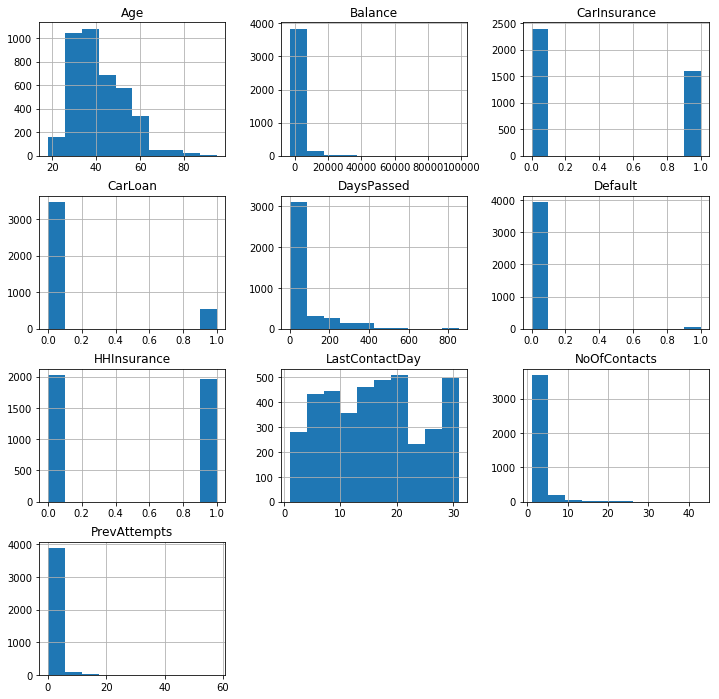

In [41]:
numeriquestrain.hist(figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002030B3218D0>,
      dtype=object)

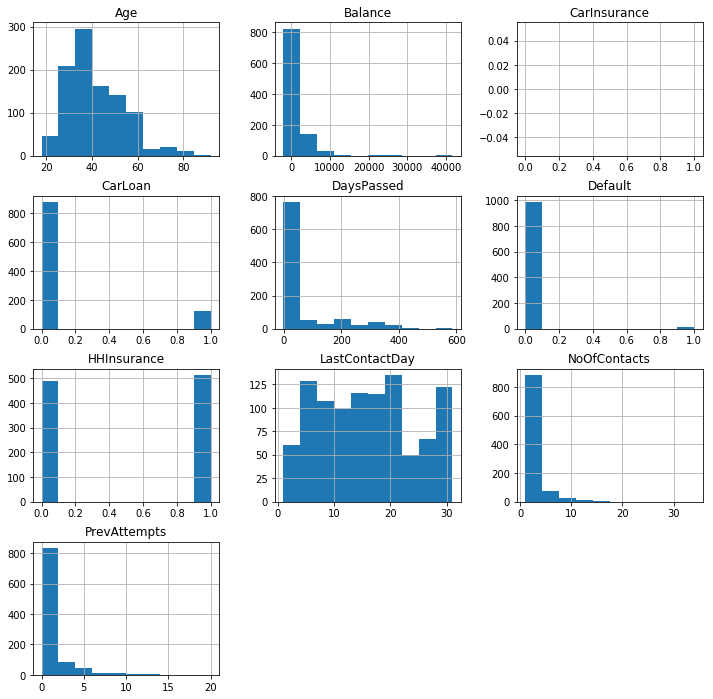

In [37]:
numeriquestest =  dftest.select_dtypes(include=['int64','float64'])
del numeriquestest['Id']
numeriquestest.hist(figsize=(12,12))

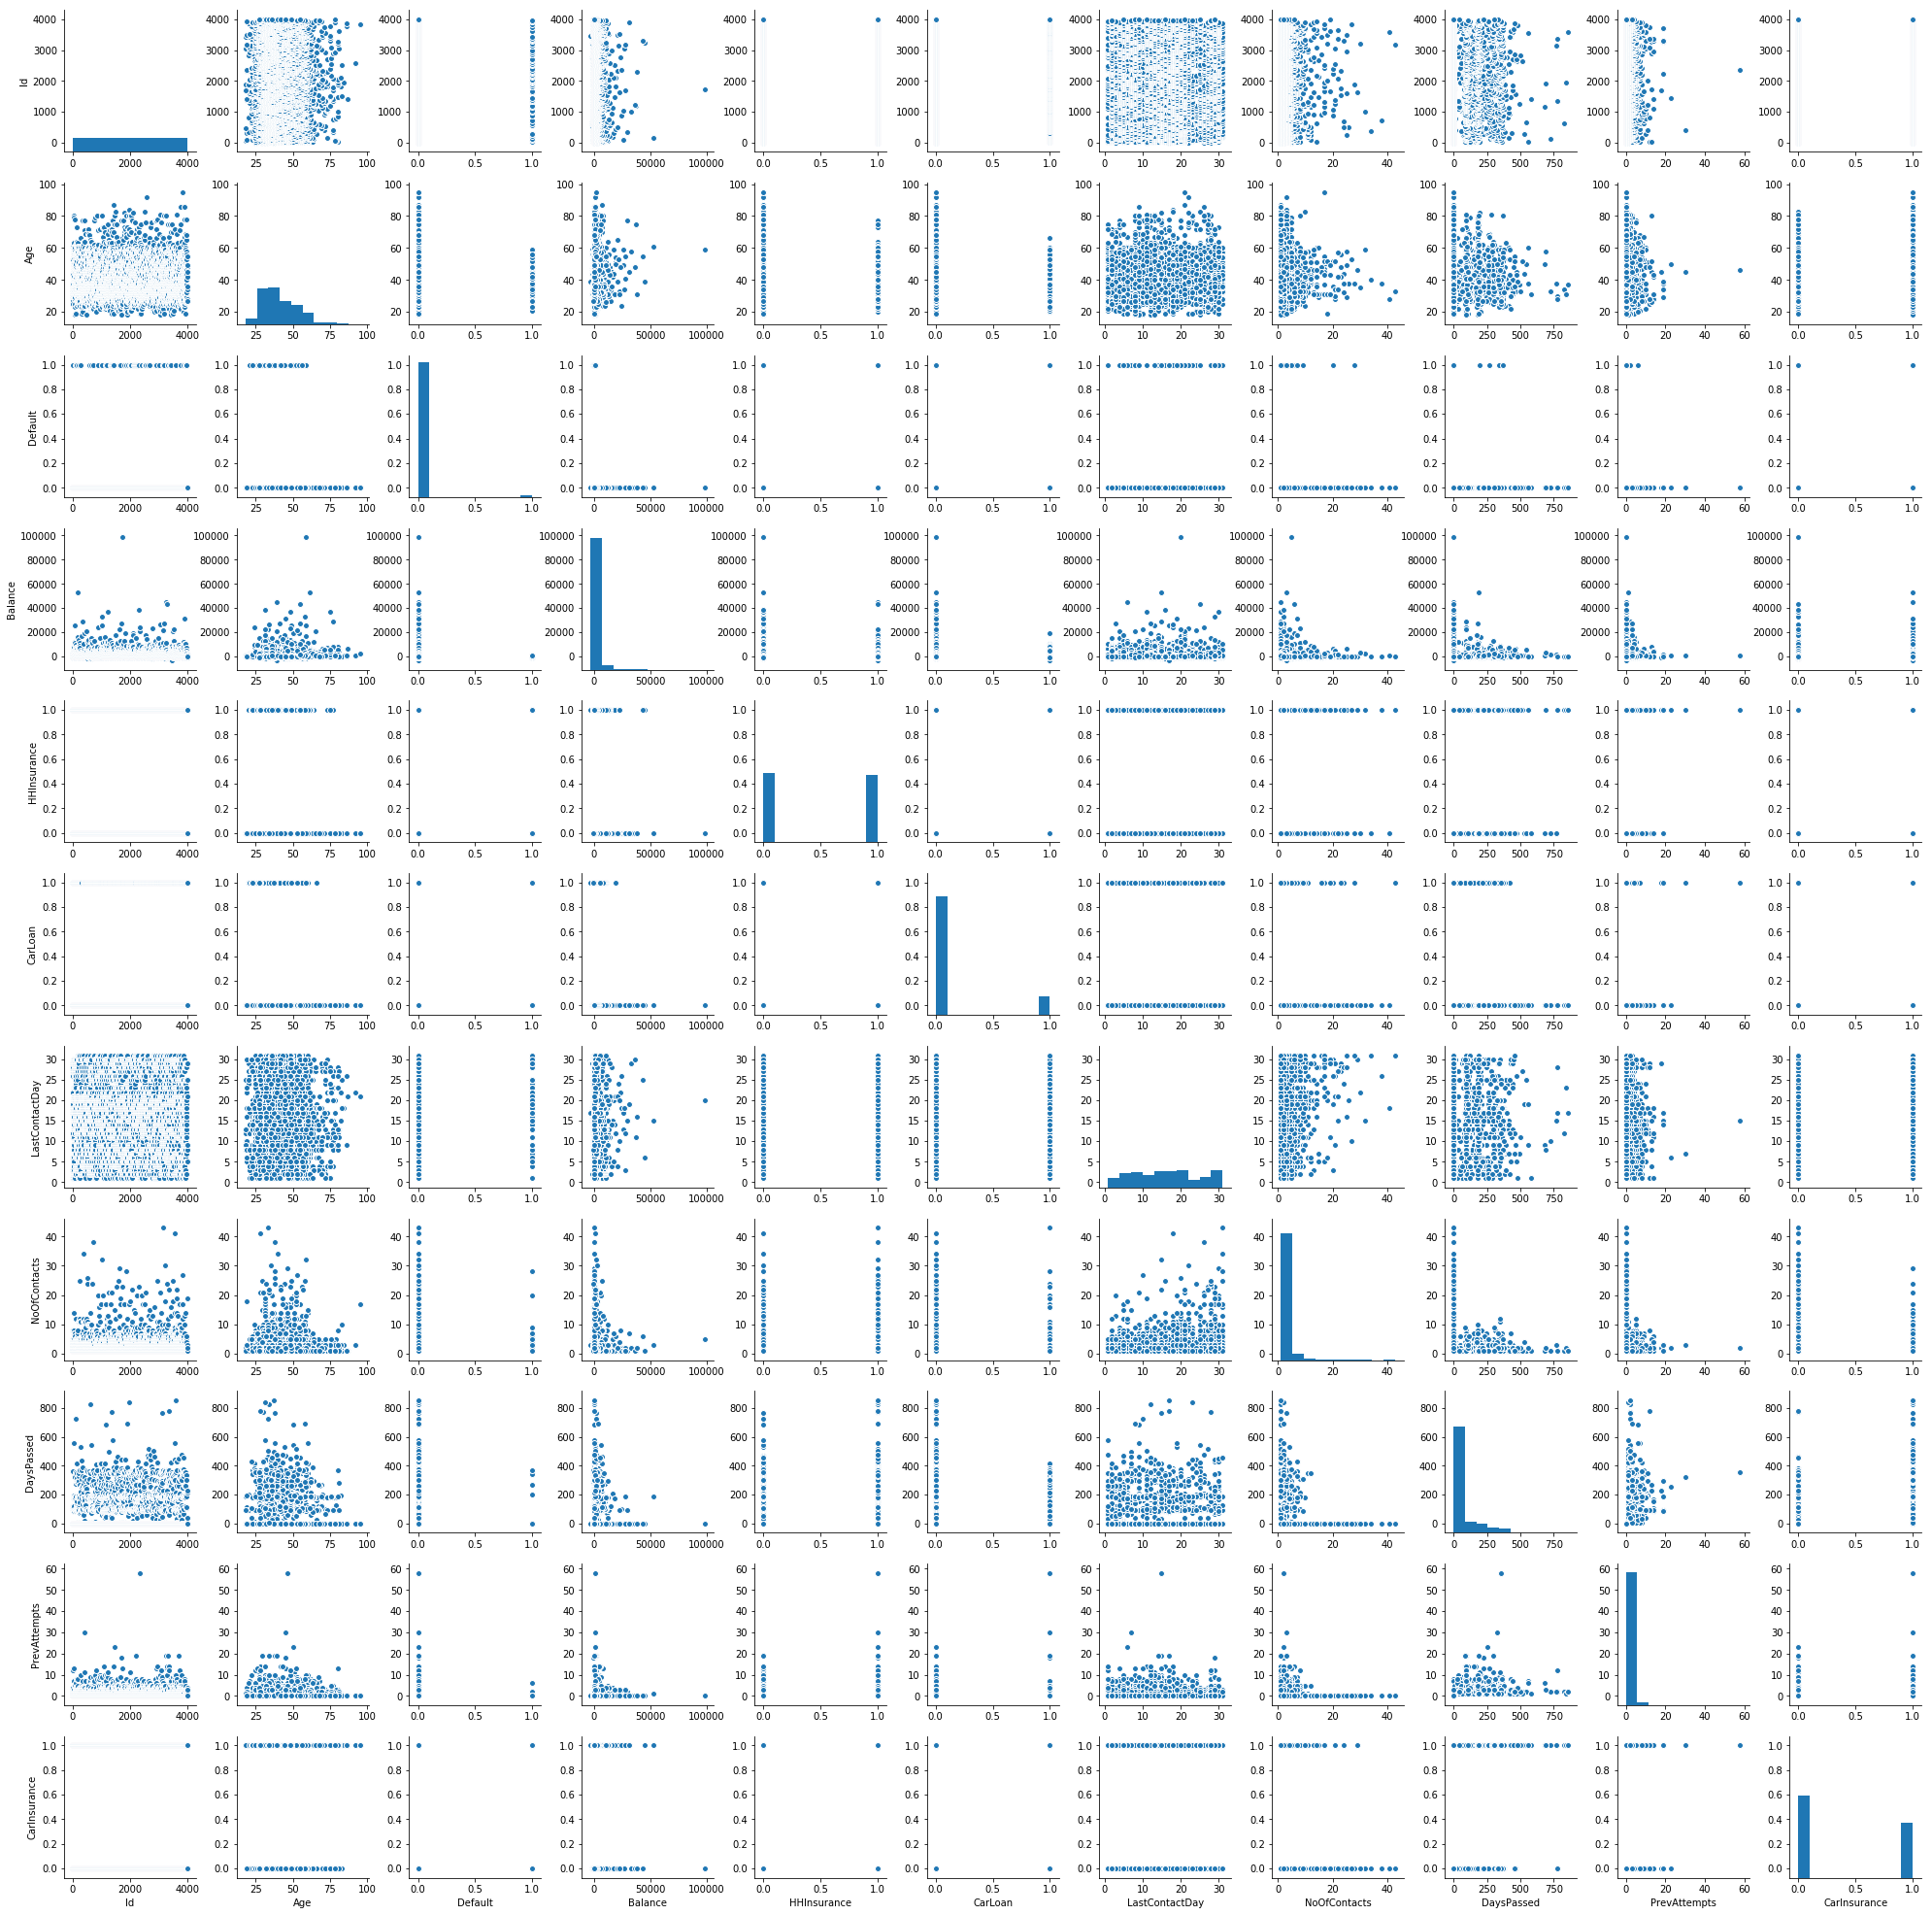

In [38]:
sns.pairplot(dftrain)